# Exploration of the ERA-int monthly data collection

* [Era-int Database Exploration](#db)
* [Indexes](#indexes)
* [SLP plot](#slpplot)
* [Rasterize a DataFrame containing data and location ](#rasterize)

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
import pymongo
from pprint import pprint
from datetime import datetime, timedelta, date
import pandas as pd
import gdal as gdl
import matplotlib.mlab as ml 

In [2]:
mongo_host_local = 'mongodb://localhost:27017/'
mg = pymongo.MongoClient(mongo_host_local)

In [3]:
pprint(mg.database_names())

['ECMWF', 'local']


In [4]:
db = mg.ECMWF
db.collection_names()

['ERAINT_grid',
 'ERAINT_lores_grid',
 'ERAINT_lores_monthly',
 'ERAINT_monthly',
 'system.indexes']

## ERA-int Database exploration <a id='db'></a>

In [5]:
ERA_vers = 'lores'

if (ERA_vers == 'hires'):
    col_dat = 'ERAINT_monthly'
    col_grid = 'ERAINT_grid'
    resolution = 0.25
elif (ERA_vers == 'lores'):
    col_dat = 'ERAINT_lores_monthly'
    col_grid = 'ERAINT_lores_grid'
    resolution = 2.5

In [6]:
con_grid = db[col_grid]
fo = con_grid.find_one()

In [7]:
pprint(fo)

{'_id': ObjectId('5a1882228cb6b815bce38f92'),
 'id_grid': 1,
 'loc': {'coordinates': [-180.0, 90.0], 'type': 'Point'}}


In [8]:
con_grid.count()

10512

In [9]:
con_data = db[col_dat]
fo = con_data.find_one()
pprint(fo)

{'_id': ObjectId('5a1af5c28cb6b8333ed30d63'),
 'al': 0.07,
 'blh': 133.39,
 'ci': 1.0,
 'd2m': 239.53,
 'date': datetime.datetime(1979, 1, 1, 0, 0),
 'hcc': 0.2,
 'id_grid': 1,
 'ie': 0.0,
 'ishf': 11.48,
 'istl1': 242.55,
 'lcc': 0.51,
 'mcc': 0.15,
 'msl': 102793.31,
 'si10': 5.65,
 'skt': 242.63,
 'sp': 102792.57,
 'sst': 271.46,
 'stl1': 242.63,
 't2m': 242.7,
 'u10': 0.95,
 'v10': 0.28,
 'year': 1979,
 'z70': 169747.63}


In [10]:
this_day = datetime(1995,1 ,1)
for doc in con_data.find({'date': this_day}).limit(2):
    pprint(doc)

{'_id': ObjectId('5a1af6f98cb6b83340dd51a3'),
 'al': 0.07,
 'blh': 96.94,
 'ci': 1.0,
 'd2m': 239.33,
 'date': datetime.datetime(1995, 1, 1, 0, 0),
 'hcc': 0.29,
 'id_grid': 1,
 'ie': 0.0,
 'ishf': 10.02,
 'istl1': 242.21,
 'lcc': 0.52,
 'mcc': 0.19,
 'msl': 102342.05,
 'si10': 4.96,
 'skt': 242.22,
 'sp': 102342.02,
 'sst': 271.46,
 'stl1': 242.24,
 't2m': 242.46,
 'u10': -0.5,
 'v10': 2.28,
 'year': 1995,
 'z70': 168316.99}
{'_id': ObjectId('5a1af6f98cb6b83340dd51a4'),
 'al': 0.07,
 'blh': 96.94,
 'ci': 1.0,
 'd2m': 239.33,
 'date': datetime.datetime(1995, 1, 1, 0, 0),
 'hcc': 0.29,
 'id_grid': 2,
 'ie': 0.0,
 'ishf': 10.02,
 'istl1': 242.21,
 'lcc': 0.52,
 'mcc': 0.19,
 'msl': 102342.05,
 'si10': 4.96,
 'skt': 242.22,
 'sp': 102342.02,
 'sst': 271.46,
 'stl1': 242.24,
 't2m': 242.46,
 'u10': -0.39,
 'v10': 2.26,
 'year': 1995,
 'z70': 168316.99}


In [11]:
# How many documents are in the daily data collection
con_data.count()

4877568

In [12]:
#con_data.drop()

In [13]:
alldays = con_data.distinct(key='date')
alldays

[datetime.datetime(2017, 8, 1, 0, 0),
 datetime.datetime(2017, 7, 1, 0, 0),
 datetime.datetime(2017, 6, 1, 0, 0),
 datetime.datetime(2017, 5, 1, 0, 0),
 datetime.datetime(2017, 4, 1, 0, 0),
 datetime.datetime(2017, 3, 1, 0, 0),
 datetime.datetime(2017, 2, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2016, 12, 1, 0, 0),
 datetime.datetime(2016, 11, 1, 0, 0),
 datetime.datetime(2016, 10, 1, 0, 0),
 datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 8, 1, 0, 0),
 datetime.datetime(2016, 7, 1, 0, 0),
 datetime.datetime(2016, 6, 1, 0, 0),
 datetime.datetime(2016, 5, 1, 0, 0),
 datetime.datetime(2016, 4, 1, 0, 0),
 datetime.datetime(2016, 3, 1, 0, 0),
 datetime.datetime(2016, 2, 1, 0, 0),
 datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2015, 12, 1, 0, 0),
 datetime.datetime(2015, 11, 1, 0, 0),
 datetime.datetime(2015, 10, 1, 0, 0),
 datetime.datetime(2015, 9, 1, 0, 0),
 datetime.datetime(2015, 8, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datet

## Data collection indexes <a id='indexes'></a>

In [14]:
ind = con_grid.index_information()
pprint(ind)

{'_id_': {'key': [('_id', 1)], 'ns': 'ECMWF.ERAINT_lores_grid', 'v': 1},
 'loc_2dsphere_id_grid_1': {'2dsphereIndexVersion': 2,
                            'key': [('loc', '2dsphere'), ('id_grid', 1)],
                            'ns': 'ECMWF.ERAINT_lores_grid',
                            'v': 1}}


In [15]:
con_data.index_information()

{'_id_': {'key': [('_id', 1)], 'ns': 'ECMWF.ERAINT_lores_monthly', 'v': 1},
 'date_-1': {'key': [('date', -1)],
  'ns': 'ECMWF.ERAINT_lores_monthly',
  'v': 1},
 'id_grid_1_date_-1': {'key': [('id_grid', 1), ('date', -1)],
  'ns': 'ECMWF.ERAINT_lores_monthly',
  'v': 1},
 'year_1_id_grid_1': {'key': [('year', 1), ('id_grid', 1)],
  'ns': 'ECMWF.ERAINT_lores_monthly',
  'v': 1}}

# Plot SLP <a id='slpplot'></a>

In [16]:
con_grid.find_one()

{'_id': ObjectId('5a1882228cb6b815bce38f92'),
 'id_grid': 1,
 'loc': {'coordinates': [-180.0, 90.0], 'type': 'Point'}}

- The domain north of 20°N is chosen for EOF decomposition for Z70 hPa and SIC to focus on the extra-tropical variability 
- The area north of 20°S is chosen for SST to also include key regions of tropical SST variability
- Query id_grid encompassed in the domain. Be careful: defining a simple box won't work on the sphere, see [Antimeridian Cutting](https://tools.ietf.org/html/rfc7946#section-3.1.9). In addition, a vertice will follow the shorterst path on the sphere. Hence, we need to define a proper circular path for both latmin and latmax.

In [17]:
this_box = {'lonmin': -180, 'lonmax': 180, 'latmin': 20, 'latmax': 90}
def genCircle(start_lon, stop_lon, lat, decreasing): 
    res = map(lambda x:[int(x), lat],
              sorted(np.arange(start=start_lon, stop=stop_lon+1), reverse=decreasing))
    return list(res)
bb = genCircle(start_lon=this_box['lonmin'], stop_lon=this_box['lonmax'], lat=10, decreasing=True)
circle_north_pos = genCircle(start_lon = this_box['lonmin'], stop_lon = this_box['lonmax'], 
                              lat = this_box['latmax'], decreasing = False)
circle_south_neg = genCircle(start_lon = this_box['lonmin'], stop_lon = this_box['lonmax'], 
                            lat = this_box['latmin'],  decreasing = True)
slp_poly = [[this_box['lonmin'], this_box['latmin']]]
slp_poly.extend(circle_north_pos)
slp_poly.extend(circle_south_neg)
print(slp_poly[0:4])

[[-180, 20], [-180, 90], [-179, 90], [-178, 90]]


In [18]:
#this_polygon =  [[ -100, 60 ], [ -100, 0 ], [ -100, -60 ], [ 100, -60 ], [ 100, 60 ], [ -100, 60 ]]#slp_poly
this_polygon = slp_poly
geo_qry = {"loc": 
           {"$geoWithin": {
               "$geometry": {
                   "type": "Polygon",
                   "coordinates": [this_polygon]
               }
           }}}
con_grid.count(filter = geo_qry)

4104

In [19]:
res = con_grid.find(filter = geo_qry, projection = {"_id":0, "id_grid": 1, "loc": 1})
grid_df = pd.DataFrame(list(res))
grid_ids = grid_df.id_grid.values
grid_ids[:10]

array([4095, 4087, 3945, 4089, 4091, 3947, 3946, 3802, 3803, 3659])

In [20]:
# Query SLP in the data collection for a given day for the grid_ids
res = con_data.find(filter = {
    "date": datetime(1988, 12, 1, 0, 0),
    "id_grid": {"$in": grid_ids.tolist()}},
                       projection = {"_id":0, "id_grid": 1, "msl": 1})
slp_df = pd.DataFrame(list(res))
slp_df.head()

,id_grid,msl
0,1,99672.65
1,2,99672.65
2,3,99672.65
3,4,99672.65
4,5,99672.65


In [21]:
grid_df.head()

,id_grid,loc
0,4095,"{'type': 'Point', 'coordinates': [-25.0, 20.0]}"
1,4087,"{'type': 'Point', 'coordinates': [-45.0, 20.0]}"
2,3945,"{'type': 'Point', 'coordinates': [-40.0, 22.5]}"
3,4089,"{'type': 'Point', 'coordinates': [-40.0, 20.0]}"
4,4091,"{'type': 'Point', 'coordinates': [-35.0, 20.0]}"


In [22]:
# Merge slp_df with grid_df:
slp_dat = pd.merge(left=slp_df, right=grid_df, on = "id_grid")
slp_dat.head()

,id_grid,msl,loc
0,1,99672.65,"{'type': 'Point', 'coordinates': [-180.0, 90.0]}"
1,2,99672.65,"{'type': 'Point', 'coordinates': [-177.5, 90.0]}"
2,3,99672.65,"{'type': 'Point', 'coordinates': [-175.0, 90.0]}"
3,4,99672.65,"{'type': 'Point', 'coordinates': [-172.5, 90.0]}"
4,5,99672.65,"{'type': 'Point', 'coordinates': [-170.0, 90.0]}"


In [86]:
#slp_dat.head()


In [87]:
ras_df = slp_dat.assign(lon = list(map(lambda x: 
                                       x[0]['coordinates'][0],
                                       slp_dat[['loc']].values)),
                        lat = list(map(lambda x: 
                                       x[0]['coordinates'][1],
                                       slp_dat[['loc']].values))
                       ).pipe(lambda x: x[['lon', 'lat', 'msl']])

ras_df.head()

,lon,lat,msl
0,-180.0,90.0,99672.65
1,-177.5,90.0,99672.65
2,-175.0,90.0,99672.65
3,-172.5,90.0,99672.65
4,-170.0,90.0,99672.65


## Rasterize a DataFrame containing data and location <a id='rasterize'></a>
The solution to the rasterization problem was found here: 
https://matplotlib.org/examples/pylab_examples/griddata_demo.html

In [130]:
lons = np.arange(start=-180, stop=180+1, step=resolution)
lats = np.arange(start=-90, stop=90+1, step=resolution)
this_field = ml.griddata(x = ras_df.lon.values,
                 y = ras_df.lat.values,
                 z = ras_df.msl.values,
                 xi = lons,
                 yi = lats,
                 interp='linear')
this_field

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [100248.96 100266.83 100284.69 ..., 100210.90000000001 100229.86 --]
 [99939.65 99950.09 99960.53 ..., 99914.22000000002 99927.0 --]
 [99672.65 99672.65 99672.65 ..., 99672.65 99672.65 --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [False False False ..., False False  True]
 [False False False ..., False False  True]
 [False False False ..., False False  True]],
       fill_value = 1e+20)

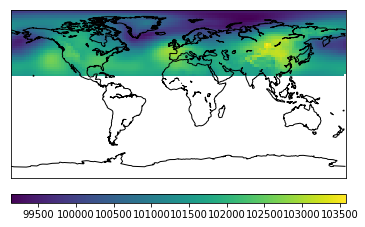

In [137]:
m = Basemap(projection='stereo', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=-180, urcrnrlon=180, resolution='c', lon_0=0)
cs = m.pcolor(lons, lats, np.squeeze(this_field))
m.drawcoastlines()
cbar = m.colorbar(cs, location='bottom', pad="10%", cmap=plt.cm.RdBu_r)
plt.show()

In [136]:
m = Basemap(projection='npstere', boundinglat=10,lon_0=270,resolution='l')
xi, yi = m(lons, lats) # comp
#cs = m.pcolor(xi, yi, np.squeeze(this_field))
#m.drawcoastlines()
#cbar = m.colorbar(cs, location='bottom', pad="10%", cmap=plt.cm.RdBu_r)
#plt.show()

RuntimeError: Buffer lengths not the same

## Do a nicer plot with re-projections

/home/dmasson/anaconda3/envs/winter_predictor/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/dmasson/anaconda3/envs/winter_predictor/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


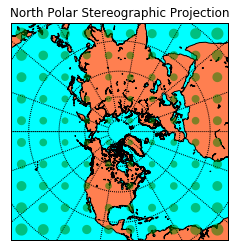

In [125]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# setup north polar stereographic basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0. Default value of lat_ts
# (latitude of true scale) is pole.
m = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
for y in np.linspace(m.ymax/20,19*m.ymax/20,10):
    for x in np.linspace(m.xmax/20,19*m.xmax/20,10):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,2.5,100,\
                        facecolor='green',zorder=10,alpha=0.5)
plt.title("North Polar Stereographic Projection")
plt.show()